<a href="https://colab.research.google.com/github/Kshi-tish/Youtube-add-preview/blob/master/Youtube_add_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
#path = "train.csv" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv( "/content/train.csv")
#data_train = pd.read_csv( "/test.csv.csv")
data_train.head()
data_train.shape
# (14999, 9)

(14999, 9)

In [92]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()
# Removing character "F" present in data

data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,4


In [93]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]= pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P  = ['H','M','S']
  for i in y:
    if i not in P:
        mm+=i
    else:
        if(i=="H"):
              h = mm
              mm = ''
        elif(i == "M"):
              m = mm
              mm = ''
        else:
              s = mm
              mm = ''
  if(h==''):
      h = '00'
  if(m == ''):
      m = '00'
  if(s==''):
      s='00'
  bp = h+':'+m+':'+s
  return bp
#train=pd.read_csv("train.csv")
mp = pd.read_csv("/content/train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2235,457,6
1,2741,2,1707,56,2,6,207,570,4
2,8138,1,2023,25,0,2,1905,136,3
3,9005,6,620860,777,161,153,1952,262,8
4,122,1,666,1,0,0,1783,31,4


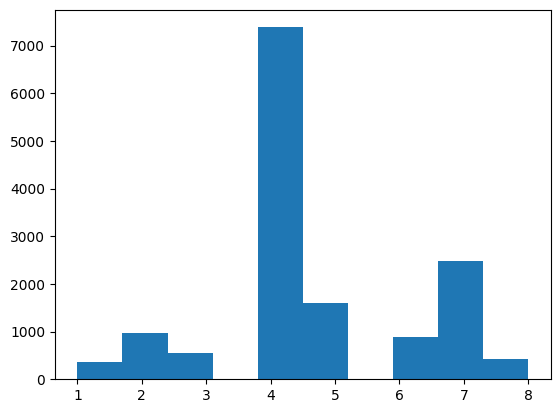

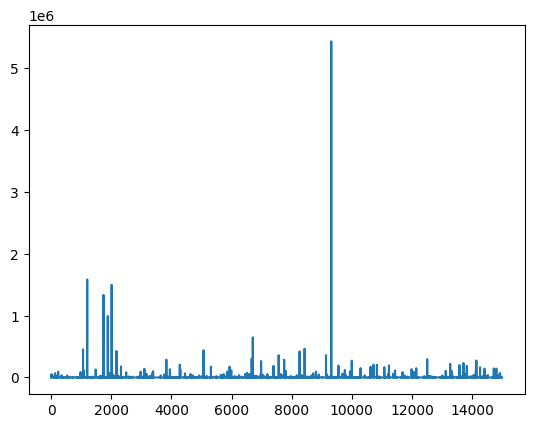

<ipython-input-94-f47d21fd6e63>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


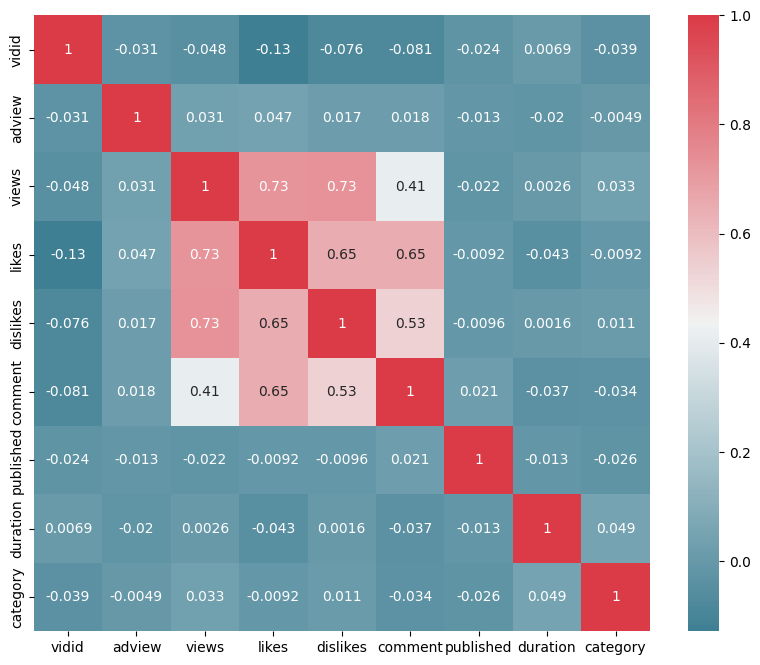

In [94]:
 # Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [95]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
x=data_train.drop(columns=['adview','vidid'])
#x=data_train.drop(["vidid"],axis=1)
#x.head()



In [96]:
x.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2235,457,6
1,1707,56,2,6,207,570,4
2,2023,25,0,2,1905,136,3
3,620860,777,161,153,1952,262,8
4,666,1,0,0,1783,31,4


In [97]:
y=data_train["adview"]

In [98]:
y.head()

0    40
1     2
2     1
3     6
4     1
Name: adview, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape


(11708, 7)

In [100]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15960396279171798

In [101]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name) :
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3487.7083352341356
Mean Squared Error: 838380209.5536872
Root Mean Squared Error: 28954.795968089416
Mean Absolute Error: 3487.7083352341356
Mean Squared Error: 838380209.5536872
Root Mean Squared Error: 28954.795968089416


In [102]:
 #Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 3805.8213797814205
Mean Squared Error: 2113572088.8152323
Root Mean Squared Error: 45973.60208658043


In [103]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3366.6815874000886
Mean Squared Error: 875861688.154219
Root Mean Squared Error: 29594.960519558375


In [104]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])


# New section

In [105]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# New section

In [106]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
#path = "train.csv" # Put path of your folder of your data if it's not in the same folder

data_test = pd.read_csv("/content/test.csv.csv")
data_test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [107]:
data_test.shape


(8764, 8)

In [108]:

# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()
# Removing character "F" present in data

data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [109]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

column_vidid=data_test['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P  = ['H','M','S']
  for i in y:
    if i not in P:
        mm+=i
    else:
        if(i=="H"):
              h = mm
              mm = ''
        elif(i == "M"):
              m = mm
              mm = ''
        else:
              s = mm
              mm = ''
  if(h==''):
      h = '00'
  if(m == ''):
      m = '00'
  if(s==''):
      s='00'
  bp = h+':'+m+':'+s
  return bp
#train=pd.read_csv("train.csv")
mp = pd.read_csv("/content/test.csv.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [120]:
x=data_test.drop('vidid',axis=1)


In [121]:
x.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [112]:
ml=joblib.load("/content/decisiontree_youtubeadview.pkl")


In [122]:

prediction=ml.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [123]:
prediction

array([58., 58., 58., ..., 58., 58., 58.])

In [125]:
submission=pd.DataFrame()
submission["adviews"]=prediction
submission.head()

,adviews
0,58.0
1,58.0
2,58.0
3,58.0
4,58.0


In [127]:
submission.to_csv("Predict Adview .csv")